# Домашнее задание к лекции «Корреляция и корреляционный анализ»

### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?  

Построить точечный график  
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
water = pd.read_csv('water.csv')
water

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


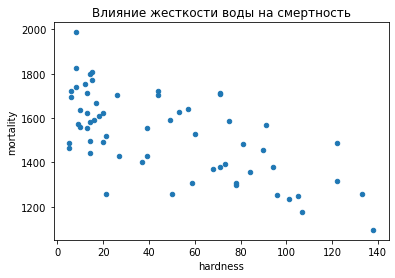

In [3]:
water.plot(kind = 'scatter', x = 'hardness', y = 'mortality', title = 'Влияние жесткости воды на смертность')

In [4]:
water[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
water[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [7]:
x = water[['hardness']]
y = water['mortality']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)

In [12]:
model.score(x_test, y_test) # коэффициент детерминации

0.410213439338294

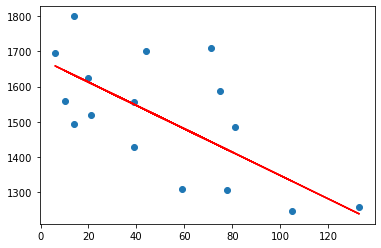

In [13]:
# график регрессионной модели и тестового набора данных
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r') 

In [14]:
y_ost = y_test - y_pred # вычисление остатков

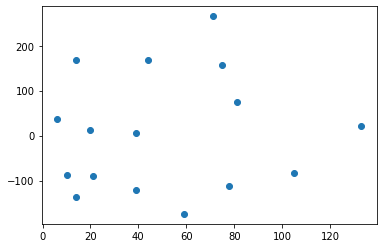

In [15]:
plt.scatter(x_test, y_ost) # график остатков

Выводы: Корреляция между жёсткостью средняя и обратнонаправленная, то есть можно предположить, что чем показатель жёткости воды выше, тем меньше смертности населения.  
Пирсон: -0,654  
Спирман: - 0,631  
Кендал: - 0,453  

Коэффициент детерминации: 0,41

### 2 Задание.  
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  

Разделить данные на 2 группы  
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности  

In [16]:
water_South = water[water['location'] == 'South']
water_North = water[water['location'] == 'North']

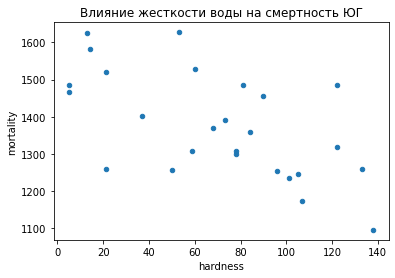

In [17]:
water_South.plot(kind = 'scatter', x = 'hardness', y = 'mortality', title = 'Влияние жесткости воды на смертность ЮГ')

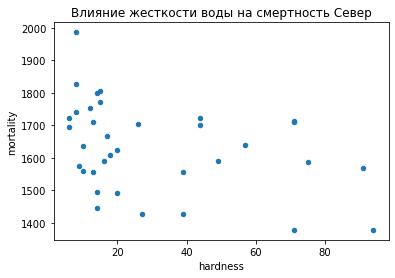

In [18]:
water_North.plot(kind = 'scatter', x = 'hardness', y = 'mortality', title = 'Влияние жесткости воды на смертность Север')

In [19]:
water_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [20]:
water_North[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [21]:
water_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [22]:
water_North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [23]:
x_South = water_South[['hardness']]
y_South = water_South['mortality']
x_North = water_North[['hardness']]
y_North = water_North['mortality']

In [24]:
x_train_South, x_test_South, y_train_South, y_test_South = train_test_split(x_South, y_South, test_size=0.30, random_state=42)
x_train_North, x_test_North, y_train_North, y_test_North = train_test_split(x_North, y_North, test_size=0.30, random_state=42)

In [25]:
model_South = LinearRegression()
model_South.fit(x_train_South, y_train_South)

LinearRegression()

In [26]:
model_North = LinearRegression()
model_North.fit(x_train_North, y_train_North)

LinearRegression()

In [27]:
y_pred_South = model_South.predict(x_test_South)
y_pred_North = model_North.predict(x_test_North)

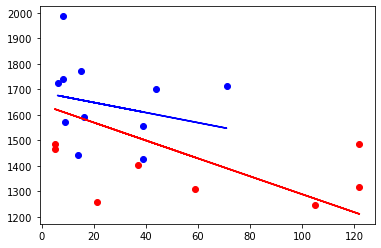

In [28]:
# график регрессионной модели и тестового набора данных
plt.scatter(x_test_South, y_test_South, c = 'r')
plt.plot(x_test_South, y_pred_South, c='r') 
plt.scatter(x_test_North, y_test_North, c = 'b')
plt.plot(x_test_North, y_pred_North, c='b') 

In [29]:
model_South.score(x_test_South, y_test_South)

-2.551922301235205

In [30]:
test_water_South = pd.DataFrame()
test_water_South['y'] = y_test_South
test_water_South = test_water_South.join(x_test_South)
test_water_South.corr()

,y,hardness
y,1.000000,-0.270509
hardness,-0.270509,1.000000


In [36]:
test_2_water_South = pd.DataFrame()
test_2_water_South['y'] = y_train_South
test_2_water_South = test_2_water_South.join(x_train_South)
test_2_water_South.corr()

,y,hardness
y,1.000000,-0.797735
hardness,-0.797735,1.000000


Коэффциент детерминации принял отрицательное значени, что говорит о некорректности построенной модели, что может быть связанно с случайным разделением данных: так корреляция данных для обучения модели высокая (-0,79), а корреляция данных, оставленных для проверки низкая (-0,27). 

In [31]:
model_North.score(x_test_North, y_test_North)

0.018885304285745863